In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
print(df.shape)
print(df.info())
print(df['type'].value_counts())

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [4]:
df_tv = df[df['type'] == 'TV Show'].copy()

In [5]:
df_tv = df_tv[['title', 'listed_in', 'rating', 'duration']]
df_tv.dropna(inplace=True)


In [6]:
df_tv=df_tv[['title','listed_in','rating','duration']]

In [7]:
df_tv.dropna(inplace=True)


In [8]:
df_tv['seasons']=df_tv['duration'].str.extract(r'(\d+)').astype(int)

In [9]:
df_tv['listed_in']=df_tv['listed_in'].str.split(',')
all_genres=df_tv['listed_in'].explode().unique()
for genre in all_genres:
    df_tv[genre] = df_tv['listed_in'].apply(lambda x: int(genre in x))
df_tv['rating'] = df_tv['rating'].astype('category').cat.codes
features = df_tv.drop(columns=['title', 'listed_in', 'duration'])



In [10]:
features = df_tv.drop(columns=['title', 'listed_in', 'duration'])


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


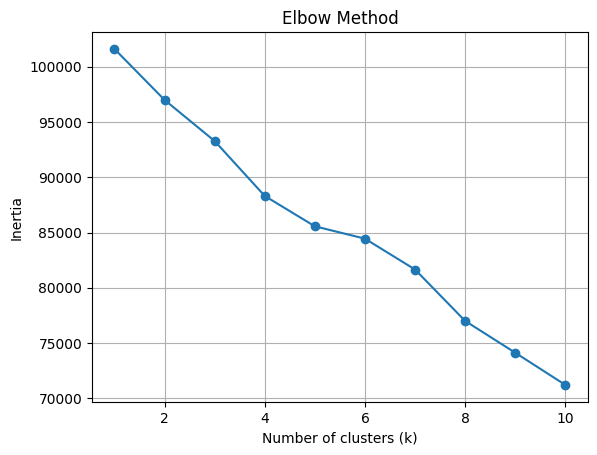

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_tv['Cluster'] = kmeans.fit_predict(scaled_features)
for i in range(4):
    print(f"\nCluster {i} Sample Shows:")
    print(df_tv[df_tv['Cluster'] == i]['title'].sample(5))



Cluster 0 Sample Shows:
4141    Littlest Pet Shop: A World of Our Own
7287                             Lego Friends
2910                  Talking Tom and Friends
120                      Heroes of Goo Jit Zu
2118                             Glitch Techs
Name: title, dtype: object

Cluster 1 Sample Shows:
6295        Bhaage Re Mann
3358    Bring It On, Ghost
2194          Unlucky Ploy
3277         My Sassy Girl
1988         The Last Word
Name: title, dtype: object

Cluster 2 Sample Shows:
5259                 Satu Hari
6963              Herrens veje
7446    Mere Papa Hero Hiralal
3534                   The Spy
6806                   Friends
Name: title, dtype: object

Cluster 3 Sample Shows:
7082                         Inside the Mossad
2948                            The Pharmacist
1116                      Glimpses of a Future
369                Myth & Mogul: John DeLorean
2795    Tiger King: Murder, Mayhem and Madness
Name: title, dtype: object


In [14]:
for i in range(4):
    print(f"\nSample shows from Cluster {i}:")
    print(df_tv[df_tv['Cluster'] == i]['title'].sample(5))



Sample shows from Cluster 0:
7288    Lego Friends: Girls on a Mission
4856              Dance & Sing with True
868                 The Magic School Bus
1200                     Waffles + Mochi
5923                          Goosebumps
Name: title, dtype: object

Sample shows from Cluster 1:
3420                Second 20s
322          You're My Destiny
1082    Don't be the First one
287             I Need Romance
2708           El Reemplazante
Name: title, dtype: object

Sample shows from Cluster 2:
6941                         Haven
5284                   No Tomorrow
5650    Star Trek: Deep Space Nine
5347           Bountiful Blessings
1294              Tribes of Europa
Name: title, dtype: object

Sample shows from Cluster 3:
626     Sophie: A Murder in West Cork
1044               High-Rise Invasion
275                       The Kingdom
1439           History of Swear Words
7759                           Powder
Name: title, dtype: object


In [15]:
cluster_summary = df_tv.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


           rating   seasons  International TV Shows   TV Dramas  \
Cluster                                                           
0        6.038860  1.992228                0.000000    0.025907   
1        3.257679  1.392491                0.911263    0.303754   
2        3.310169  2.455932                0.406780    0.605085   
3        3.759892  1.517086                0.000000    0.135791   

          TV Mysteries  Crime TV Shows   International TV Shows  \
Cluster                                                           
0             0.000000        0.000000                 0.000000   
1             0.001706        0.005119                 0.000000   
2             0.155932        0.091525                 0.000000   
3             0.004496        0.307554                 0.517986   

          TV Action & Adventure  Docuseries   Reality TV  ...  TV Shows  \
Cluster                                                   ...             
0                      0.051813    0.000000 

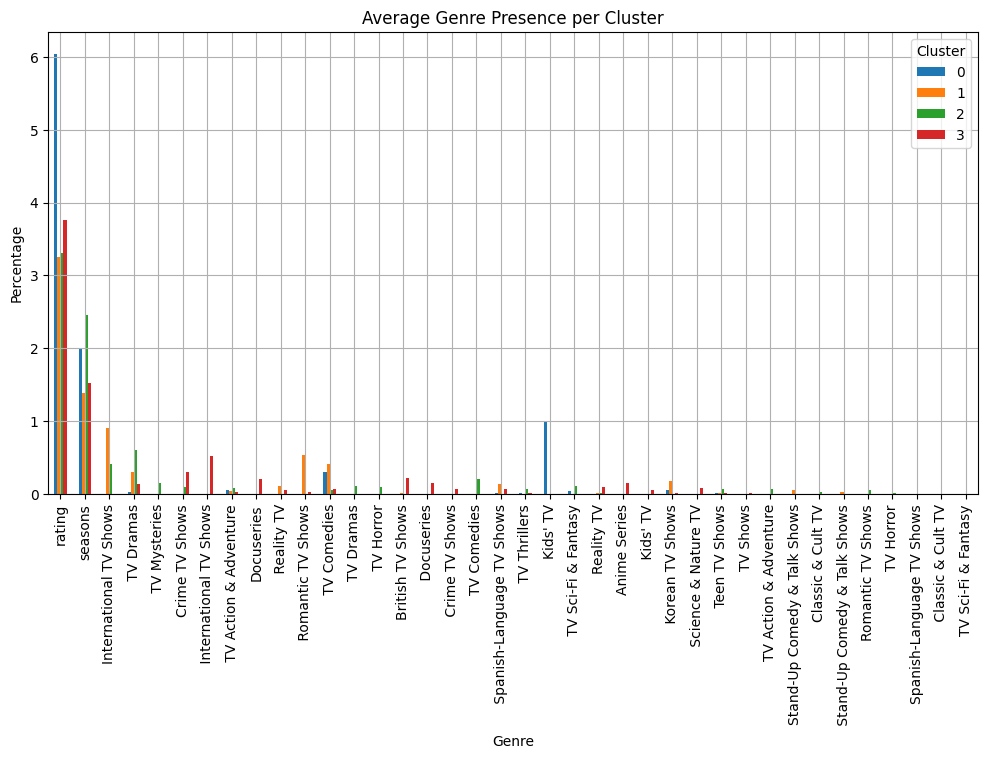

In [16]:
cluster_summary.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Genre Presence per Cluster")
plt.ylabel("Percentage")
plt.xlabel("Genre")
plt.grid(True)
plt.show()

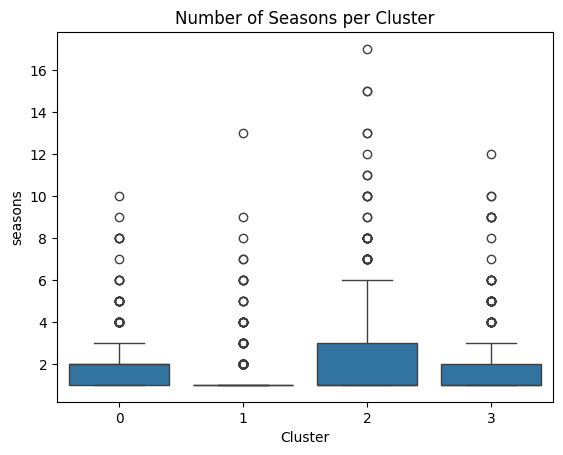

In [17]:
sns.boxplot(data=df_tv, x='Cluster', y='seasons')
plt.title("Number of Seasons per Cluster")
plt.show()


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
df_tv['PCA1'] = pca_features[:, 0]
df_tv['PCA2'] = pca_features[:, 1]


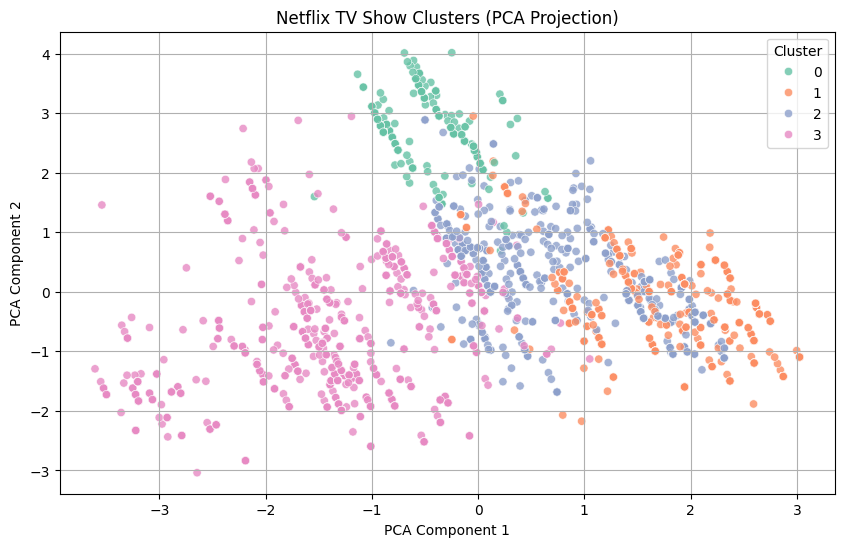

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_tv,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set2',
    alpha=0.8
)
plt.title('Netflix TV Show Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [20]:
for i in range(4):
    print(f"\nCluster {i} Examples:")
    print(df_tv[df_tv['Cluster'] == i]['title'].sample(5))



Cluster 0 Examples:
4430                    Creators
3823    Heidi, bienvenida a casa
527                  Puffin Rock
324                      44 Cats
2910     Talking Tom and Friends
Name: title, dtype: object

Cluster 1 Examples:
2821                                             Kingdom
5100    Dave Chappelle: Equanimity & The Bird Revelation
3222                                         Mythomaniac
4645                                                Life
1516                                  Home for Christmas
Name: title, dtype: object

Cluster 2 Examples:
108                                  Dive Club
2480    Trailer Park Boys: The Animated Series
5192                           The Golden Path
4196              La Grande Chaumière Violette
6381                              Brown Nation
Name: title, dtype: object

Cluster 3 Examples:
6660    Earth's Natural Wonders: Life at the Extremes
4056                                           Losers
3852                                      

In [21]:
cluster_mean = df_tv.groupby('Cluster').mean(numeric_only=True)
print(cluster_mean)


           rating   seasons  International TV Shows   TV Dramas  \
Cluster                                                           
0        6.038860  1.992228                0.000000    0.025907   
1        3.257679  1.392491                0.911263    0.303754   
2        3.310169  2.455932                0.406780    0.605085   
3        3.759892  1.517086                0.000000    0.135791   

          TV Mysteries  Crime TV Shows   International TV Shows  \
Cluster                                                           
0             0.000000        0.000000                 0.000000   
1             0.001706        0.005119                 0.000000   
2             0.155932        0.091525                 0.000000   
3             0.004496        0.307554                 0.517986   

          TV Action & Adventure  Docuseries   Reality TV  ...  \
Cluster                                                   ...   
0                      0.051813    0.000000     0.005181  ...   

In [22]:
for i in range(4):
    print(f"\nCluster {i} Sample Shows:")
    print(df_tv[df_tv['Cluster'] == i]['title'].sample(5).values)



Cluster 0 Sample Shows:
['Sharkdog' 'PJ Masks' 'Stoked'
 'Strawberry Shortcake: Berry Bitty Adventures'
 'Miraculous: Tales of Ladybug & Cat Noir']

Cluster 1 Sample Shows:
['Fary : Hexagone' 'Hometown Cha-Cha-Cha'
 'Elite Short Stories: Omar Ander Alexis'
 'Club Friday To Be Continued - The Promise' "If I Hadn't Met You"]

Cluster 2 Sample Shows:
['46' 'Prank Encounters' 'Frequency' 'Tayee' 'Jhansi Ki Rani']

Cluster 3 Sample Shows:
['After Life' 'Apache: The Life of Carlos Tevez' 'Skin Wars' 'Brotherhood'
 'Einsatzgruppen: The Nazi Death Squads']


In [23]:
cluster_summary = df_tv.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


           rating   seasons  International TV Shows   TV Dramas  \
Cluster                                                           
0        6.038860  1.992228                0.000000    0.025907   
1        3.257679  1.392491                0.911263    0.303754   
2        3.310169  2.455932                0.406780    0.605085   
3        3.759892  1.517086                0.000000    0.135791   

          TV Mysteries  Crime TV Shows   International TV Shows  \
Cluster                                                           
0             0.000000        0.000000                 0.000000   
1             0.001706        0.005119                 0.000000   
2             0.155932        0.091525                 0.000000   
3             0.004496        0.307554                 0.517986   

          TV Action & Adventure  Docuseries   Reality TV  ...  \
Cluster                                                   ...   
0                      0.051813    0.000000     0.005181  ...   

In [24]:
cluster_labels = {
    0: 'Drama-heavy Long Series',
    1: 'Short Comedies',
    2: 'Mixed Genre Epics',
    3: 'Family/Kids Shows'
}

df_tv['Cluster_Label'] = df_tv['Cluster'].map(cluster_labels)


In [25]:
df_tv.to_csv("netflix_tv_clusters_labeled.csv", index=False)
